# Explore here

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
from pickle import dump

# Task

In this notebook we want to explore the k means model for clustering.

We are being given a dataset containing data from the 1990 California census regarding housing. We are interested in creating clusters according to income and spatial position.

In [6]:
URL = 'https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv'
raw_df = pd.read_csv(URL)

In [7]:
raw_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


# Model creation

In the state of california there are two main population centers, San Francisco and Los Angeles. Since we are clustering using location we can expect at least two sets of clusters, one related to each one of those places and maybe an extra one for the population located in rural areas. In urban areas there is usually a bigger variance of the median income, so we could expect at least other two sets of clusters that are correlated to the median house income. For this reason it would be reasonable to have a clustering model with at least 6 clusters. Testing I came to the conclusion that 7 was a more appropriate number of clusters since with 6 there was a cluster for high house income that had values from both San Francisco and L.A., increasing the number by one helped separating that cluster into two.


In [46]:
df = raw_df.copy()
df = df[['Latitude', 'Longitude', 'MedInc']]

model = KMeans(7, n_init='auto', random_state=42)
x_train, x_test = train_test_split(df, random_state=42)
model.fit(x_train)

y_train = model.labels_
y_test = model.predict(x_test)

x_test['cluster'] = y_test
x_train['cluster'] = y_train

x_test

,Latitude,Longitude,MedInc,cluster
20046,36.06,-119.01,1.6812,0
3024,35.14,-119.46,2.5313,0
15663,37.80,-122.44,3.4801,5
20484,34.28,-118.72,5.7376,4
9814,36.62,-121.93,3.7250,5
...,...,...,...,...
5363,34.04,-118.42,6.6260,4
19755,40.18,-122.21,2.1898,3
4885,34.02,-118.26,2.1667,0
13043,38.51,-121.06,6.8869,2


## Figure 1

Plotting of the clusters in the training set.

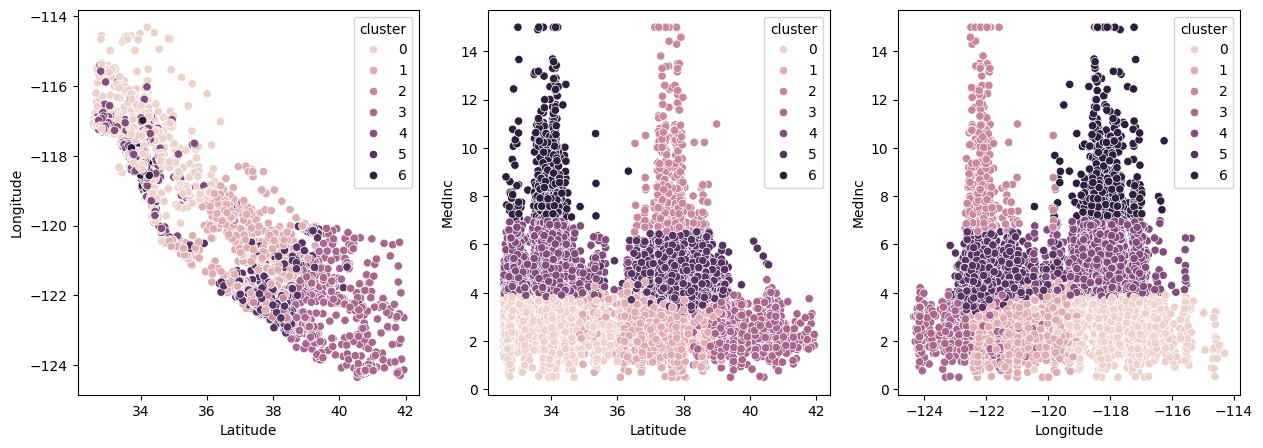

In [47]:
ig, axis = plt.subplots(1,3,figsize=(15,5))

sns.scatterplot(ax = axis[0], data=x_train, x='Latitude', y = 'Longitude', hue='cluster')
sns.scatterplot(ax = axis[1], data=x_train, x='Latitude', y = 'MedInc', hue='cluster')
sns.scatterplot(ax = axis[2], data=x_train, x='Longitude', y = 'MedInc', hue='cluster')

plt.show()

## Figure 2

plotting of the clusters comparing the training set (dots) and the test set (crosses).

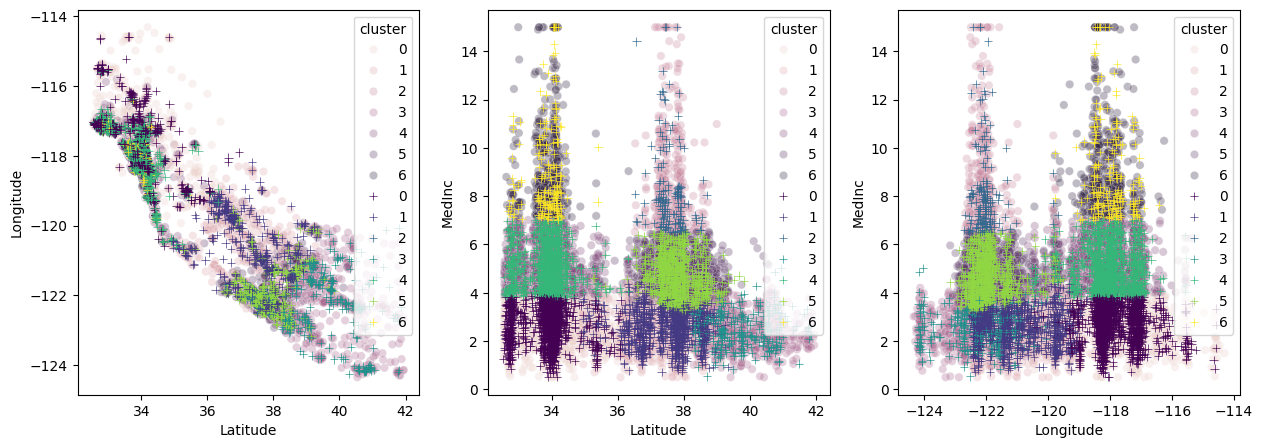

In [51]:
fig, axis = plt.subplots(1,3,figsize=(15,5))

sns.scatterplot(ax = axis[0], data=x_train, x='Latitude', y = 'Longitude', hue='cluster', alpha=0.3)
sns.scatterplot(ax = axis[1], data=x_train, x='Latitude', y = 'MedInc', hue='cluster', alpha=0.3)
sns.scatterplot(ax = axis[2], data=x_train, x='Longitude', y = 'MedInc', hue='cluster', alpha=0.3)

sns.scatterplot(ax = axis[0], data=x_test, x='Latitude', y = 'Longitude', hue='cluster', palette='viridis', marker='+')
sns.scatterplot(ax = axis[1], data=x_test, x='Latitude', y = 'MedInc', hue='cluster', palette='viridis', marker='+')
sns.scatterplot(ax = axis[2], data=x_test, x='Longitude', y = 'MedInc', hue='cluster', palette='viridis', marker='+')  

plt.show()

# Supervised model

As is usual after creating a clustering model, we will create a supervised learning model to be used to label unseen data.
In this case we could have chosen any classifier model since the clusters (as we can see in figures 1 and 2) are very distinct and present little overlapping. We choose a random forest classifier to have a decent predictive power.

In [55]:
classifier = RandomForestClassifier(random_state=42)
classifier.fit(x_train[['Latitude', 'Longitude', 'MedInc']], x_train.cluster)
classifier.predict(x_test[['Latitude', 'Longitude', 'MedInc']])
y_pred = classifier.predict(x_test[['Latitude', 'Longitude', 'MedInc']])
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Decision Tree model: {accuracy:.2f}')

print('Confisuon matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy of the Decision Tree model: 1.00
Confisuon matrix:
 [[1648    3    0    0    2    0    0]
 [   2  894    0    1    0    4    0]
 [   0    0  152    0    0    1    0]
 [   0    4    0  287    0    0    0]
 [   0    1    0    0 1131    0    0]
 [   0    3    0    0    0  845    0]
 [   0    0    0    0    1    0  181]]


# conclusions and final thoughts

- Clustering revealed that there is a pattern for the high population areas in california of a noticeable high, medium and low house income, also it revealed that houses in southern california are too similar in terms of income to have different labels.
- Our classification model for the clusters had an extremely high accuracy and it should be intuitively obvious from the confusion matrix that other metrics like recall, precision etc should be extremely high too. This is likely because of the combination of two tings: the clustering method and using an algorithm based on decision trees. Since decision trees are constructed using metrics like the Gini purity coefficient or entropy, it is excellent at identifying groups of similar data points, and since we gave the model data based on clusters of similar datapoints it is just natural that our model was really good at classifying clusters.

In [45]:
dump(model, open('../models/kmeans_model.pkl', 'wb'))
dump(classifier, open('../models/random_forest_model.pkl', 'wb'))